In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
df = pd.read_csv('./table1.csv')
df.head()

,ID,x,y,sy,sx,rhoxy,Unnamed: 6
0,1,201,592,61,9,-0.84,NaN
1,2,244,401,25,4,0.31,NaN
2,3,47,583,38,11,0.64,NaN
3,4,287,402,15,7,-0.27,NaN
4,5,203,495,21,5,-0.33,NaN


<ErrorbarContainer object of 3 artists>

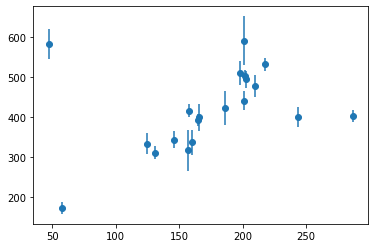

In [3]:
plt.errorbar(df.x, df.y, df.sy,
             ls='', marker='o')

In [6]:
def f(x, m, b):
    return m * x + b

xdata = df.x.values
ydata = df.y.values
sigmay = df.sy.values

In [7]:
p, cov = curve_fit(
    f,
    xdata,
    ydata,
    p0=[1, 0],
    sigma=sigmay)
std = np.sqrt(np.diag(cov))

Text(97, 173, '(1.08 +/- 0.31) * x + (213.27 +/- 57.77)')

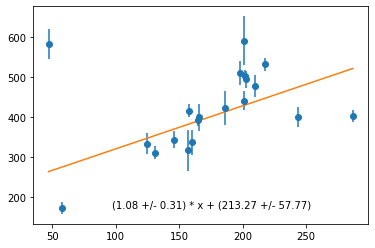

In [11]:
plt.errorbar(df.x, df.y, df.sy,
             ls='', marker='o')
x = np.linspace(xdata.min(), xdata.max(), 1000)
plt.plot(x, f(x, p[0], p[1]))
s = "(%1.2f +/- %1.2f) * x + (%1.2f +/- %1.2f)" % (p[0], std[0], p[1], std[1])
plt.text(xdata.min() + 50, ydata.min(), s)

# In lmfit

In [13]:
from lmfit.models import LinearModel
model = LinearModel()
out = model.fit(df.y.values, x=df.x.values, weights=1/sigmay)

In [15]:
out

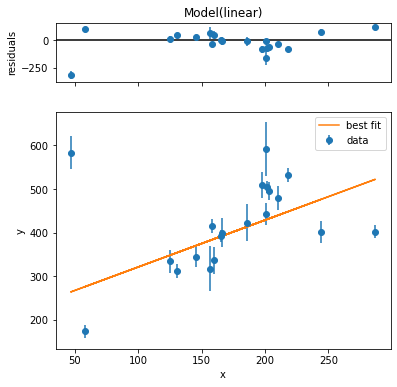

In [20]:
out.plot();

Text(127, 173, '(1.08 +/- 0.31) * x + (213.27 +/- 57.77)')

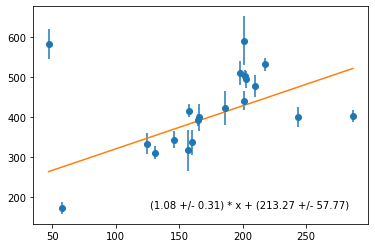

In [24]:
plt.errorbar(df.x, df.y, df.sy,
             ls='', marker='o')
x = np.linspace(xdata.min(), xdata.max(), 1000)
plt.plot(x, f(x, p[0], p[1]))
s = "(%1.2f +/- %1.2f) * x + (%1.2f +/- %1.2f)" % (p[0], std[0], p[1], std[1])
plt.text(xdata.min()+80, ydata.min(), s)